In [1]:
#Configurazione 3
%matplotlib inline   
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#RIMPIAZZANDO I PREZZI
df = pd.read_csv('training.csv') 

#REPLACE MISSING VALUES & OUTLIERS in un colpo solo...
#Rimpiazzo gli 0 e 1 dei valori di MMR con np.nan e poi rimpiazzo con la media fatta rispetto a, dapprima Make, Model e SubModel
#(di cui se ne trovano la maggior parte), poi Make e Model, e poi Make per i pochi rimasti
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(0, np.nan)
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(1, np.nan)

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(0, np.nan)
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(1, np.nan)

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(0, np.nan)
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(1, np.nan)

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(0, np.nan)
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(1, np.nan)

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(0, np.nan)
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(1, np.nan)

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

#Sostituzione missing values colonna TopThreeAmericanName
df.loc[15769,'TopThreeAmericanName']='GM' 
df.loc[18532,'TopThreeAmericanName']='CHRYSLER'
df.loc[20016,'TopThreeAmericanName']='CHRYSLER'
df.loc[35157,'TopThreeAmericanName']='CHRYSLER'

#Rimpiazzo i valori nulli di Nationality con AMERICAN perche' i 4 che mancavano di TopThreeAmericanName erano tutti americani
df['Nationality'] = df['Nationality'].fillna('AMERICAN')

#IMPORTANTE: Siccome le righe con valori nulli di Color e SubModel sono gli stessi (e sono solo 7) li togliamo:
df=df.dropna(subset=['SubModel', 'Color']) 

#Rimpiazzati i missing values di Transmission (con la moda fra le macchine dello stesso modello (e stesso Make))
df['Transmission'] = df['Transmission'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mode()[0])) #faccio la moda perche' sono 'Transimission' stringhe

#Convertito la colonna Trim a stringa (c'erano dei valori interi che impedivano di calcolare la moda)
df['Trim']=df['Trim'].astype(str) 
df['Trim'] = df['Trim'].replace('nan', np.nan)
#Rimpiazzato i missing values della colonna Trim con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
df['Trim'] = df.groupby(['Make','Model', 'SubModel']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby(['Make','Model']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby('Make').Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)

#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make Model (molto precisa)
df['WheelType']=df['WheelType'].astype(str) 
df['WheelType'] = df['WheelType'].replace('nan', 'ValoreNulloWheelType')
#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
#df['WheelType'] = df.groupby(['Make','Model','SubModel']).WheelType.apply(
  #  lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)
#df['WheelType'] = df.groupby(['Make','Size']).WheelType.apply(
 #   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)
#df['WheelType'] = df.groupby('Make').WheelType.apply(
#    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)


#eliminiamo Primeunit e AUCGUART perche' mancano 55703 valori
df = df.drop(['PRIMEUNIT', 'AUCGUART'], axis=1)

#eliminiamo BYRNO, RefId, VNZIP1 e WheelTypeID perche' non forniscono informazione
df = df.drop(['BYRNO', 'RefId','WheelTypeID'], axis=1)

#Togliamo le righe che hanno Size o Trim np.nan (4 di Size e 1 di Trim)
df=df.dropna(subset=['Size','Trim'])

#Outlier: c'e' un valore di VehBCost uguale a 1. Lo trattiamo come un outlier sostituendolo con la media fatta raggruppando su Make e Model
df['VehBCost'] = df['VehBCost'].replace(1, np.nan)
df['VehBCost'] = df['VehBCost'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df=df[df['VehicleAge']>0] #Tolgo una riga con VehicleAge=0 sennò non posso calcolare MilesPerYear
#Aggiunta di una nuova colonna
df['MilesPerYear'] = df['VehOdo'] / df['VehicleAge']
#------------------------------------------- CLASSIFICATION -------------------------------------------------------------

#eliminazione classe da predire
classes = df['IsBadBuy'] 

#df['Month'] = df['PurchDate'][1]

#sostituzione attributi non numerici con attributi numerici, e cancellazione delle colonne non utili per il cluster
#del df['PurchDate']
#del df['SubModel'] #son troppi
#del df['Model']
#del df['TopThreeAmericanName']
#del df['VNST']
#del df['Color']
#del df['Trim']
#del df['WheelType']
#del df['IsOnlineSale']
#del df['VehYear']
df['AcquisitionAveragePrice']=(df['MMRAcquisitionAuctionAveragePrice']+df['MMRAcquisitionAuctionCleanPrice']+df['MMRAcquisitionRetailAveragePrice']+df['MMRAcquisitonRetailCleanPrice'])/4.0
df['CurrentAveragePrice']=(df['MMRCurrentAuctionAveragePrice']+df['MMRCurrentAuctionCleanPrice']+df['MMRCurrentRetailAveragePrice']+df['MMRCurrentRetailCleanPrice'])/4.0
#del df['MMRAcquisitionAuctionAveragePrice']
#del df['MMRAcquisitionAuctionCleanPrice'] 
#del df['MMRAcquisitionRetailAveragePrice']
#del df['MMRAcquisitonRetailCleanPrice']
#del df['MMRCurrentAuctionAveragePrice']
#del df['MMRCurrentAuctionCleanPrice']
#del df['MMRCurrentRetailAveragePrice']
#del df['MMRCurrentRetailCleanPrice']
#del df['Make']

dt = pd.read_csv('test.csv') 

#REPLACE MISSING VALUES & OUTLIERS in un colpo solo...
#Rimpiazzo gli 0 e 1 dei valori di MMR con np.nan e poi rimpiazzo con la media fatta rispetto a, dapprima Make, Model e SubModel
#(di cui se ne trovano la maggior parte), poi Make e Model, e poi Make per i pochi rimasti
dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].replace(0, np.nan)
dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].replace(1, np.nan)

dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].replace(0, np.nan)
dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].replace(1, np.nan)

dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].replace(0, np.nan)
dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].replace(1, np.nan)

dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].replace(0, np.nan)
dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].replace(1, np.nan)

dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].replace(0, np.nan)
dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].replace(1, np.nan)

dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].replace(0, np.nan)
dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].replace(1, np.nan)

dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRCurrentRetailAveragePrice'] = dt['MMRCurrentRetailAveragePrice'].replace(0, np.nan)
dt['MMRCurrentRetailAveragePrice'] = dt['MMRCurrentRetailAveragePrice'].replace(1, np.nan)

dt['MMRCurrentRetailAveragePrice'] = dt['MMRCurrentRetailAveragePrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].replace(0, np.nan)
dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].replace(1, np.nan)

dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------

dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentRetailAveragePrice'] = dt['MMRCurrentRetailAveragePrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))#

dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

#IMPORTANTE: Togliamo la riga con tutti i problemi
#dt=dt.dropna(subset=['SubModel']) 

#Convertito la colonna Trim a stringa (c'erano dei valori interi che impedivano di calcolare la moda)
dt['Trim']=dt['Trim'].astype(str) 
#Rimpiazzato i missing values della colonna Trim con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
dt['Trim'] = dt.groupby(['Make','Model', 'SubModel']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
dt['Trim'] = dt.groupby(['Make','Model']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
dt['Trim'] = dt.groupby('Make').Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)

#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make Model (molto precisa)
dt['WheelType']=dt['WheelType'].astype(str) 
dt['WheelType'] = dt['WheelType'].replace('nan', 'ValoreNulloWheelType')
#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
#df['WheelType'] = df.groupby(['Make','Model','SubModel']).WheelType.apply(
  #  lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)
#df['WheelType'] = df.groupby(['Make','Size']).WheelType.apply(
 #   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)
#df['WheelType'] = df.groupby('Make').WheelType.apply(
#    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)

#eliminiamo Primeunit e AUCGUART perche' mancano 55703 valori
dt = dt.drop(['PRIMEUNIT', 'AUCGUART'], axis=1)

#eliminiamo BYRNO, RefId, VNZIP1 e WheelTypeID perche' non forniscono informazione
dt = dt.drop(['BYRNO', 'WheelTypeID'], axis=1)

#Togliamo le righe che hanno Size o Trim np.nan (4 di Size e 1 di Trim)
#dt=dt.dropna(subset=['Size','Trim'])

#Outlier: c'e' un valore di VehBCost uguale a 1. Lo trattiamo come un outlier sostituendolo con la media fatta raggruppando su Make e Model
dt['VehBCost'] = dt['VehBCost'].replace(1, np.nan)
dt['VehBCost'] = dt['VehBCost'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))


dt.loc[dt['VehicleAge']<=0, 'VehicleAge']=1
#dt=dt[dt['VehicleAge']>0] #Tolgo una riga con VehicleAge=0 sennò non posso calcolare MilesPerYear
#Aggiunta di una nuova colonna
#Aggiunta di una nuova colonna
dt['MilesPerYear'] = dt['VehOdo'] / dt['VehicleAge']


#dt.describe()
#dt.isnull().sum()

#------------------------------------------- CLASSIFICATION -------------------------------------------------------------

#eliminazione classe da predire
classes = dt['IsBadBuy'] 


#sostituzione attributi non numerici con attributi numerici, e cancellazione delle colonne non utili per il cluster
#del dt['PurchDate']
#del dt['SubModel'] #son troppi
#del dt['Model']
#del dt['TopThreeAmericanName']
#del dt['VNST']
#del dt['Color']
#del dt['Trim']
#del dt['WheelType']
#del dt['IsOnlineSale']
#del dt['VehYear']
                                                    #MEDIE PREZZI
dt['AcquisitionAveragePrice']=(dt['MMRAcquisitionAuctionAveragePrice']+dt['MMRAcquisitionAuctionCleanPrice']+dt['MMRAcquisitionRetailAveragePrice']+dt['MMRAcquisitonRetailCleanPrice'])/4.0
dt['CurrentAveragePrice']=(dt['MMRCurrentAuctionAveragePrice']+dt['MMRCurrentAuctionCleanPrice']+dt['MMRCurrentRetailAveragePrice']+dt['MMRCurrentRetailCleanPrice'])/4.0
#del dt['MMRAcquisitionAuctionAveragePrice']
#del dt['MMRAcquisitionAuctionCleanPrice'] 
#del dt['MMRAcquisitionRetailAveragePrice']
#del dt['MMRAcquisitonRetailCleanPrice']
#del dt['MMRCurrentAuctionAveragePrice']
#del dt['MMRCurrentAuctionCleanPrice']
#del dt['MMRCurrentRetailAveragePrice']
#del dt['MMRCurrentRetailCleanPrice']
#del dt['Make']

dt['Nationality'] = dt['Nationality'].fillna('AMERICAN')
dt['SubModel'] = dt['SubModel'].fillna('4D SEDAN')
dt['Color'] = dt['Color'].fillna('SILVER')
dt['Transmission'] = dt['Transmission'].fillna('AUTO')
dt['Size'] = dt['Size'].fillna('MEDIUM')
dt['TopThreeAmericanName'] = dt['TopThreeAmericanName'].fillna('GM')
dt = dt.drop('RefId', axis=1)

In [2]:
import datetime   #Aggiungiamo colonna mese e cancelliamo data (così rimangono Year e Month)
df['data']=pd.to_datetime(df.PurchDate)
df['Month']=df.data.dt.month
df['Day'] = df.data.dt.day
del df['data']
del df['PurchDate']
def rapporto(col1:str, col2:str, df):
    return df[col1] / df[col2]
 
df['WarrantyCost_f_VehBCost'] = rapporto('WarrantyCost', 'VehBCost', df)
df['VehBCost_f_VehOdo'] = rapporto('VehBCost', 'VehOdo', df)
df['VehBCost_f_VehicleAge'] = rapporto('VehBCost', 'VehicleAge', df)
#----------------------------------------------------TEST----------------------------------------------------------------------

dt['data']=pd.to_datetime(dt.PurchDate)
dt['Month']=dt.data.dt.month
dt['Day'] = dt.data.dt.day
del dt['data']
del dt['PurchDate']
dt['WarrantyCost_f_VehBCost'] = rapporto('WarrantyCost', 'VehBCost', dt)
dt['VehBCost_f_VehOdo'] = rapporto('VehBCost', 'VehOdo', dt)
dt['VehBCost_f_VehicleAge'] = rapporto('VehBCost', 'VehicleAge', dt)

#Nuovi attributi numerici con differenze tra Current e Acquisition


df['DiffAcquisitionAuctionAverage1']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRAcquisitionAuctionCleanPrice']
df['DiffAcquisitionAuctionAverage2']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRAcquisitionRetailAveragePrice']
df['DiffAcquisitionAuctionAverage3']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRAcquisitonRetailCleanPrice']
df['DiffAcquisition_CurrentAuctionAveragePrice']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRCurrentAuctionAveragePrice']
df['DiffAcquisitionAuctionAverage5']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRCurrentAuctionCleanPrice']
df['DiffAcquisitionAuctionAverage6']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRCurrentRetailAveragePrice']
df['DiffAcquisitionAuctionAverage7']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRCurrentRetailCleanPrice']

df['DiffAcquisitionAuctionClean1']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRAcquisitionRetailAveragePrice']
df['DiffAcquisitionAuctionClean2']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRAcquisitonRetailCleanPrice']
df['DiffAcquisitionAuctionClean3']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRCurrentAuctionAveragePrice']
df['DiffAcquisition_CurrentAuctionCleanPrice']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRCurrentAuctionCleanPrice']
df['DiffAcquisitionAuctionClean5']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRCurrentRetailAveragePrice']
df['DiffAcquisitionAuctionClean6']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRCurrentRetailCleanPrice']

df['DiffAcquisitionRetailAverage1']=df['MMRAcquisitionRetailAveragePrice']-df['MMRAcquisitonRetailCleanPrice']
df['DiffAcquisitionRetailAverage2']=df['MMRAcquisitionRetailAveragePrice']-df['MMRCurrentAuctionAveragePrice']
df['DiffAcquisitionRetailAverage3']=df['MMRAcquisitionRetailAveragePrice']-df['MMRCurrentAuctionCleanPrice']
df['DiffAcquisition_CurrentRetailAveragePrice']=df['MMRAcquisitionRetailAveragePrice']-df['MMRCurrentRetailAveragePrice']
df['DiffAcquisitionRetailAverage5']=df['MMRAcquisitionRetailAveragePrice']-df['MMRCurrentRetailCleanPrice']

df['DiffAcquisitionRetailClean1']=df['MMRAcquisitonRetailCleanPrice']-df['MMRCurrentAuctionAveragePrice']
df['DiffAcquisitionRetailClean2']=df['MMRAcquisitonRetailCleanPrice']-df['MMRCurrentAuctionCleanPrice']
df['DiffAcquisitionRetailClean3']=df['MMRAcquisitonRetailCleanPrice']-df['MMRCurrentRetailAveragePrice']
df['DiffAcquisitionRetailClean4']=df['MMRAcquisitonRetailCleanPrice']-df['MMRCurrentRetailCleanPrice']

df['DiffCurrentAuctionAverage1']=df['MMRCurrentAuctionAveragePrice']-df['MMRCurrentAuctionCleanPrice']
df['DiffCurrentAuctionAverage2']=df['MMRCurrentAuctionAveragePrice']-df['MMRCurrentRetailAveragePrice']
df['DiffCurrentAuctionAverage3']=df['MMRCurrentAuctionAveragePrice']-df['MMRCurrentRetailCleanPrice']

df['DiffCurrentAuctionClean1']=df['MMRCurrentAuctionCleanPrice']-df['MMRCurrentRetailAveragePrice']
df['DiffCurrentAuctionClean2']=df['MMRCurrentAuctionCleanPrice']-df['MMRCurrentRetailCleanPrice']

df['DiffCurrentRetailAverage1']=df['MMRCurrentRetailAveragePrice']-df['MMRCurrentRetailCleanPrice']

#VehBCost
df['DiffVehBCURRENTAuctionAverage']=df['VehBCost']-df['MMRCurrentAuctionAveragePrice']
df['DiffVehBCURRENTAuctionClean']=df['VehBCost']-df['MMRCurrentAuctionCleanPrice']
df['DiffVehBCURRENTRetailAverage']=df['VehBCost']-df['MMRCurrentRetailAveragePrice']
df['DiffVehBCURRENTRetailClean']=df['VehBCost']-df['MMRCurrentRetailCleanPrice']

#Nuovi attributi numerici con differenze tra VehBCost e Acquisition
df['DiffVehBACQUISITIONAuctionAverage']=df['VehBCost']-df['MMRAcquisitionAuctionAveragePrice']
df['DiffVehBACQUISITIONAuctionClean']=df['VehBCost']-df['MMRAcquisitionAuctionCleanPrice']
df['DiffVehBACQUISITIONRetailAverage']=df['VehBCost']-df['MMRAcquisitionRetailAveragePrice']
df['DiffVehBACQUISITIONRetailClean']=df['VehBCost']-df['MMRAcquisitonRetailCleanPrice']

#---------------------------------------------------- TEST --------------------------------------------------


dt['DiffAcquisitionAuctionAverage1']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRAcquisitionAuctionCleanPrice']
dt['DiffAcquisitionAuctionAverage2']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRAcquisitionRetailAveragePrice']
dt['DiffAcquisitionAuctionAverage3']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRAcquisitonRetailCleanPrice']
dt['DiffAcquisition_CurrentAuctionAveragePrice']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRCurrentAuctionAveragePrice']
dt['DiffAcquisitionAuctionAverage5']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRCurrentAuctionCleanPrice']
dt['DiffAcquisitionAuctionAverage6']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRCurrentRetailAveragePrice']
dt['DiffAcquisitionAuctionAverage7']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRCurrentRetailCleanPrice']

dt['DiffAcquisitionAuctionClean1']=dt['MMRAcquisitionAuctionCleanPrice']-dt['MMRAcquisitionRetailAveragePrice']
dt['DiffAcquisitionAuctionClean2']=dt['MMRAcquisitionAuctionCleanPrice']-dt['MMRAcquisitonRetailCleanPrice']
dt['DiffAcquisitionAuctionClean3']=dt['MMRAcquisitionAuctionCleanPrice']-dt['MMRCurrentAuctionAveragePrice']
dt['DiffAcquisition_CurrentAuctionCleanPrice']=dt['MMRAcquisitionAuctionCleanPrice']-dt['MMRCurrentAuctionCleanPrice']
dt['DiffAcquisitionAuctionClean5']=dt['MMRAcquisitionAuctionCleanPrice']-dt['MMRCurrentRetailAveragePrice']
dt['DiffAcquisitionAuctionClean6']=dt['MMRAcquisitionAuctionCleanPrice']-dt['MMRCurrentRetailCleanPrice']

dt['DiffAcquisitionRetailAverage1']=dt['MMRAcquisitionRetailAveragePrice']-dt['MMRAcquisitonRetailCleanPrice']
dt['DiffAcquisitionRetailAverage2']=dt['MMRAcquisitionRetailAveragePrice']-dt['MMRCurrentAuctionAveragePrice']
dt['DiffAcquisitionRetailAverage3']=dt['MMRAcquisitionRetailAveragePrice']-dt['MMRCurrentAuctionCleanPrice']
dt['DiffAcquisition_CurrentRetailAveragePrice']=dt['MMRAcquisitionRetailAveragePrice']-dt['MMRCurrentRetailAveragePrice']
dt['DiffAcquisitionRetailAverage5']=dt['MMRAcquisitionRetailAveragePrice']-dt['MMRCurrentRetailCleanPrice']

dt['DiffAcquisitionRetailClean1']=dt['MMRAcquisitonRetailCleanPrice']-dt['MMRCurrentAuctionAveragePrice']
dt['DiffAcquisitionRetailClean2']=dt['MMRAcquisitonRetailCleanPrice']-dt['MMRCurrentAuctionCleanPrice']
dt['DiffAcquisitionRetailClean3']=dt['MMRAcquisitonRetailCleanPrice']-dt['MMRCurrentRetailAveragePrice']
dt['DiffAcquisitionRetailClean4']=dt['MMRAcquisitonRetailCleanPrice']-dt['MMRCurrentRetailCleanPrice']

dt['DiffCurrentAuctionAverage1']=dt['MMRCurrentAuctionAveragePrice']-dt['MMRCurrentAuctionCleanPrice']
dt['DiffCurrentAuctionAverage2']=dt['MMRCurrentAuctionAveragePrice']-dt['MMRCurrentRetailAveragePrice']
dt['DiffCurrentAuctionAverage3']=dt['MMRCurrentAuctionAveragePrice']-dt['MMRCurrentRetailCleanPrice']

dt['DiffCurrentAuctionClean1']=dt['MMRCurrentAuctionCleanPrice']-dt['MMRCurrentRetailAveragePrice']
dt['DiffCurrentAuctionClean2']=dt['MMRCurrentAuctionCleanPrice']-dt['MMRCurrentRetailCleanPrice']

dt['DiffCurrentRetailAverage1']=dt['MMRCurrentRetailAveragePrice']-dt['MMRCurrentRetailCleanPrice']

#VehBCost
dt['DiffVehBCURRENTAuctionAverage']=dt['VehBCost']-dt['MMRCurrentAuctionAveragePrice']
dt['DiffVehBCURRENTAuctionClean']=dt['VehBCost']-dt['MMRCurrentAuctionCleanPrice']
dt['DiffVehBCURRENTRetailAverage']=dt['VehBCost']-dt['MMRCurrentRetailAveragePrice']
dt['DiffVehBCURRENTRetailClean']=dt['VehBCost']-dt['MMRCurrentRetailCleanPrice']

#Nuovi attributi numerici con differenze tra VehBCost e Acquisition
dt['DiffVehBACQUISITIONAuctionAverage']=dt['VehBCost']-dt['MMRAcquisitionAuctionAveragePrice']
dt['DiffVehBACQUISITIONAuctionClean']=dt['VehBCost']-dt['MMRAcquisitionAuctionCleanPrice']
dt['DiffVehBACQUISITIONRetailAverage']=dt['VehBCost']-dt['MMRAcquisitionRetailAveragePrice']
dt['DiffVehBACQUISITIONRetailClean']=dt['VehBCost']-dt['MMRAcquisitonRetailCleanPrice']



In [3]:
from sklearn.preprocessing import OneHotEncoder
le =LabelEncoder()
df['IsBadBuy'] = le.fit_transform(df['IsBadBuy'])
df['IsOnlineSale']=le.fit_transform(df['IsOnlineSale'])
df['Auction'] = le.fit_transform(df['Auction'])
df['Make'] = le.fit_transform(df['Make'])
df['Model'] = le.fit_transform(df['Model'])
df['Trim'] = le.fit_transform(df['Trim'])
df['SubModel'] = le.fit_transform(df['SubModel'])
df['Color'] = le.fit_transform(df['Color'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df['WheelType'] = le.fit_transform(df['WheelType'])
df['Nationality'] = le.fit_transform(df['Nationality'])
df['Size'] = le.fit_transform(df['Size'])
df['TopThreeAmericanName'] = le.fit_transform(df['TopThreeAmericanName'])
df['VNST'] = le.fit_transform(df['VNST'])
df['VNZIP1']=le.fit_transform(df['VNZIP1'])

#----------------------------------------------------TEST----------------------------------------------------------------------


dt['IsBadBuy'] = le.fit_transform(dt['IsBadBuy'])
dt['IsOnlineSale']=le.fit_transform(dt['IsOnlineSale'])
dt['Auction'] = le.fit_transform(dt['Auction'])
dt['Make'] = le.fit_transform(dt['Make'])
dt['Model'] = le.fit_transform(dt['Model'])
dt['Trim'] = le.fit_transform(dt['Trim'])
dt['SubModel'] = le.fit_transform(dt['SubModel'])
dt['Color'] = le.fit_transform(dt['Color'])
dt['Transmission'] = le.fit_transform(dt['Transmission'])
dt['WheelType'] = le.fit_transform(dt['WheelType'])
dt['Nationality'] = le.fit_transform(dt['Nationality'])
dt['Size'] = le.fit_transform(dt['Size'])
dt['TopThreeAmericanName'] = le.fit_transform(dt['TopThreeAmericanName'])
dt['VNST'] = le.fit_transform(dt['VNST'])
dt['VNZIP1']=le.fit_transform(dt['VNZIP1'])

In [4]:
attributes = [col for col in df.columns if col != 'IsBadBuy']
X_train = df[attributes].values
y_train=df['IsBadBuy']

X_test = dt[attributes].values
y_test = dt['IsBadBuy']

In [5]:
clf = DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=210, min_samples_leaf=100, class_weight = {0:1, 1:3.4})
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 3.4}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=210,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
zip1 = zip(attributes, clf.feature_importances_)
res = sorted(zip1, key = lambda x: x[1])
for col, imp in res:
    print(col, imp)

Transmission 0.0
Nationality 0.0
IsOnlineSale 0.0
CurrentAveragePrice 0.0
DiffAcquisitionAuctionAverage2 9.215621263420972e-05
TopThreeAmericanName 0.0008174977540004453
MMRAcquisitonRetailCleanPrice 0.0008562044023672457
DiffVehBACQUISITIONAuctionClean 0.001032649877551784
DiffAcquisitionAuctionAverage3 0.001312094530019407
DiffAcquisitionRetailClean1 0.001419541532730166
VehYear 0.0016050276321394911
DiffVehBACQUISITIONRetailClean 0.0016198254317816155
Auction 0.0016616703926797733
MMRCurrentRetailAveragePrice 0.0017678258183153716
Color 0.0021117530666259834
DiffVehBCURRENTAuctionClean 0.0022219969144417636
DiffAcquisitionRetailClean2 0.002227263974470984
DiffAcquisitionRetailClean3 0.0023303830031107596
DiffAcquisitionRetailClean4 0.0023491465449471944
DiffVehBCURRENTRetailClean 0.0024870928542071297
DiffVehBCURRENTRetailAverage 0.002546239593873464
WarrantyCost 0.002658205189455934
DiffAcquisitionAuctionClean6 0.0028585230011776365
MMRCurrentRetailCleanPrice 0.0029153361411992083


In [7]:
y_pred = clf.predict(X_train)
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))
confusion_matrix(y_train, y_pred)

Accuracy 0.8631901735391363
F1-score [0.92160443 0.46323431]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     51166
           1       0.45      0.48      0.46      7207

    accuracy                           0.86     58373
   macro avg       0.69      0.70      0.69     58373
weighted avg       0.87      0.86      0.87     58373



array([[46941,  4225],
       [ 3761,  3446]], dtype=int64)

In [8]:
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.8424333767212441
F1-score [0.91005084 0.36534216]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     12829
           1       0.36      0.37      0.37      1768

    accuracy                           0.84     14597
   macro avg       0.63      0.64      0.64     14597
weighted avg       0.85      0.84      0.84     14597



array([[11635,  1194],
       [ 1106,   662]], dtype=int64)

In [13]:
import pydotplus
from sklearn import tree
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=["GOOD", "BAD"],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data) 

In [14]:
fig = Image(graph.create_png(), format='jpeg')

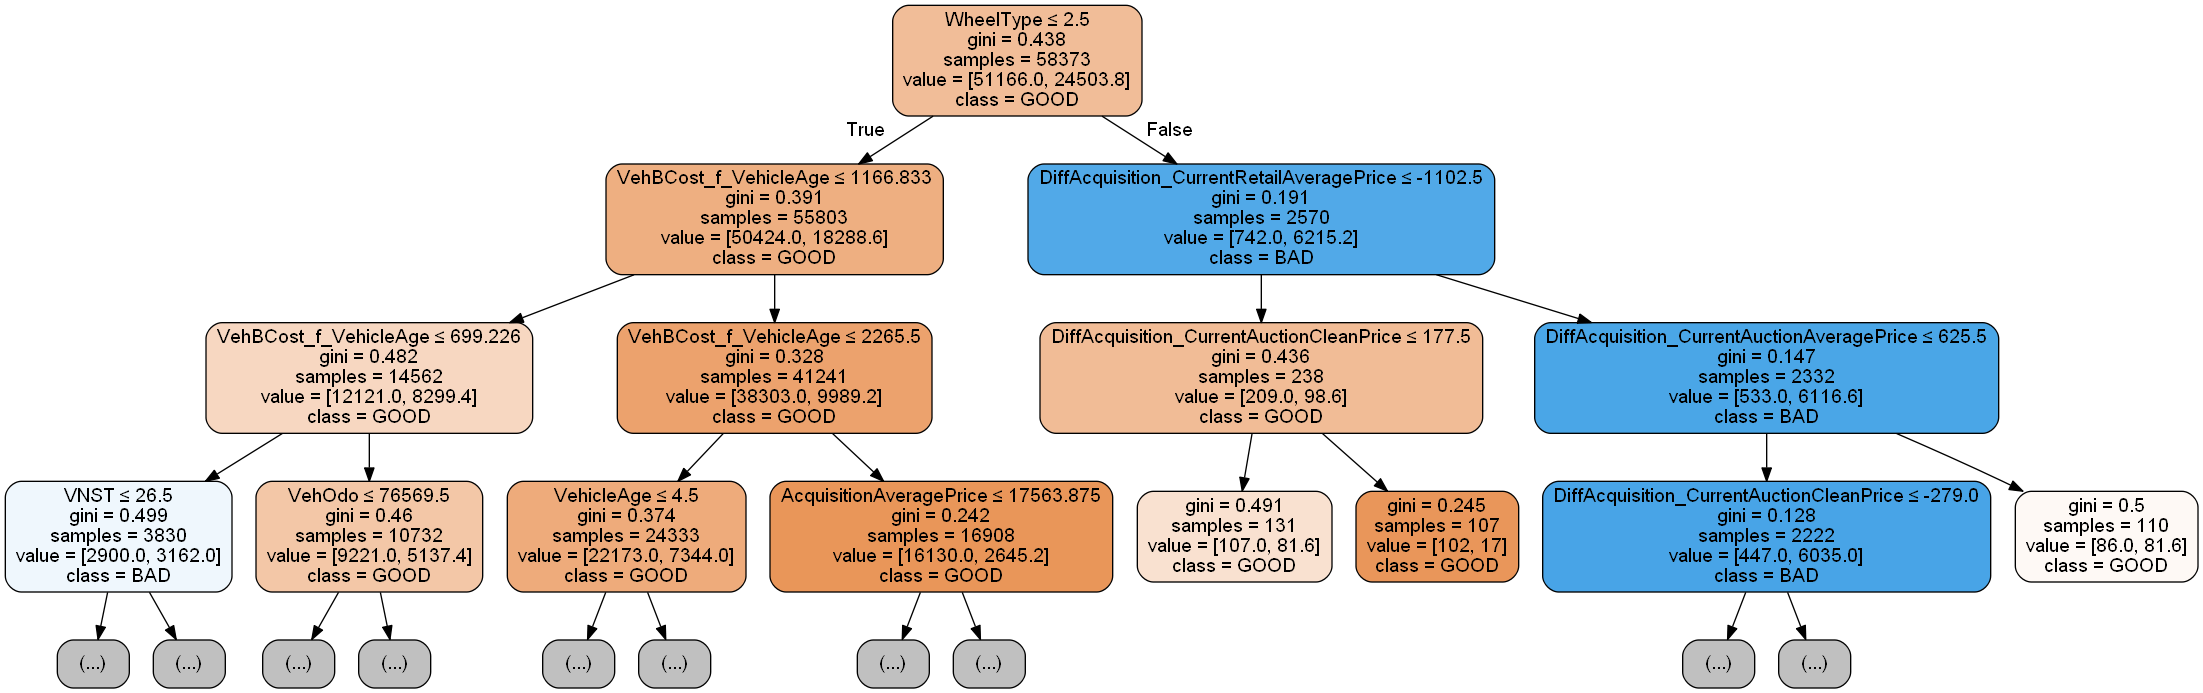

In [15]:
fig

In [16]:
help(tree.export_graphviz)

Help on function export_graphviz in module sklearn.tree.export:

export_graphviz(decision_tree, out_file=None, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)
    Export a decision tree in DOT format.
    
    This function generates a GraphViz representation of the decision tree,
    which is then written into `out_file`. Once exported, graphical renderings
    can be generated using, for example::
    
        $ dot -Tps tree.dot -o tree.ps      (PostScript format)
        $ dot -Tpng tree.dot -o tree.png    (PNG format)
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    Read more in the :ref:`User Guide <tree>`.
    
    Parameters
    ----------
    decision_tree : decision tree classifier
        The decision tree to be exported to GraphViz.
    
 